In [1]:
!pip install scikit-learn pandas numpy matplotlib seaborn

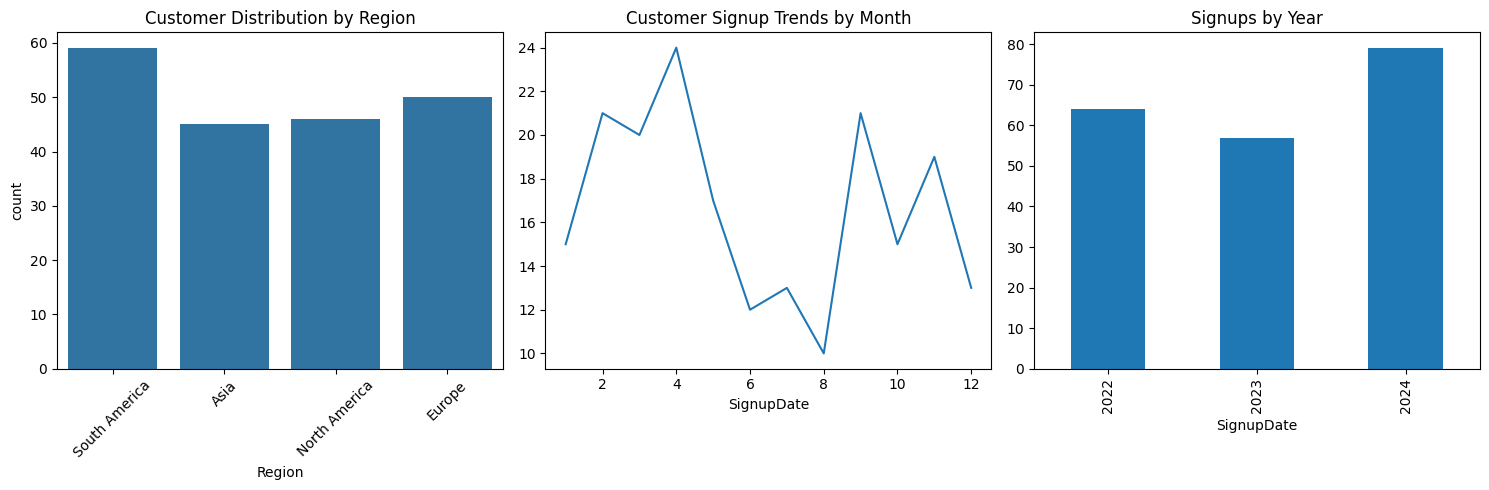

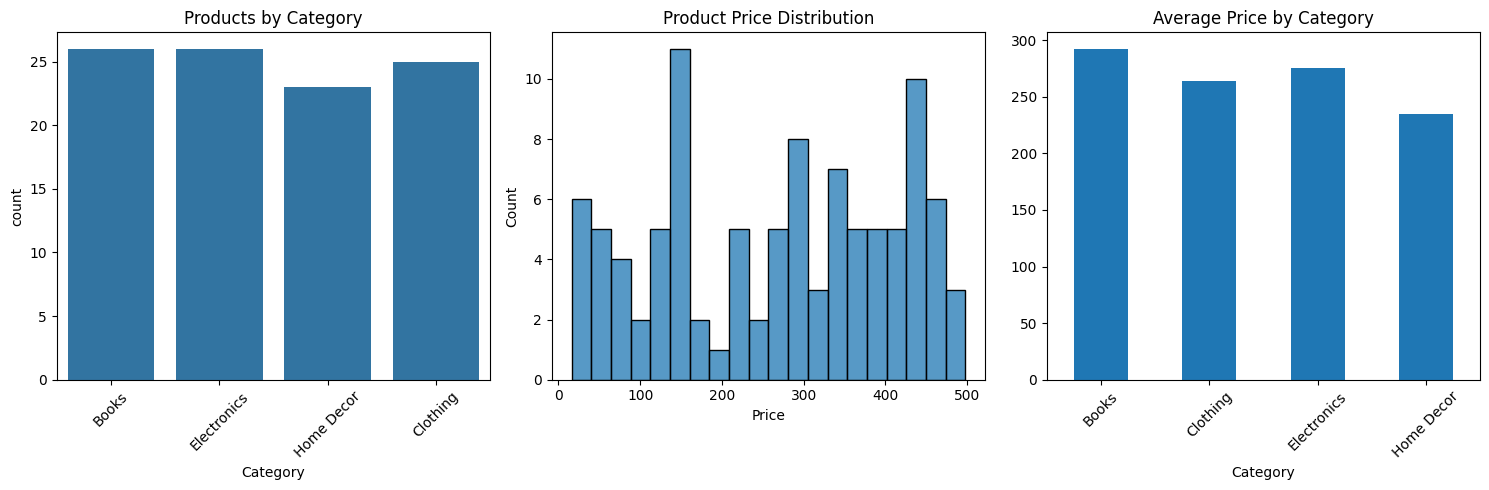

<ipython-input-4-a6762f7c072d>:110: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions_df.set_index('TransactionDate')['TotalValue'].resample('M').sum().plot(kind='line')


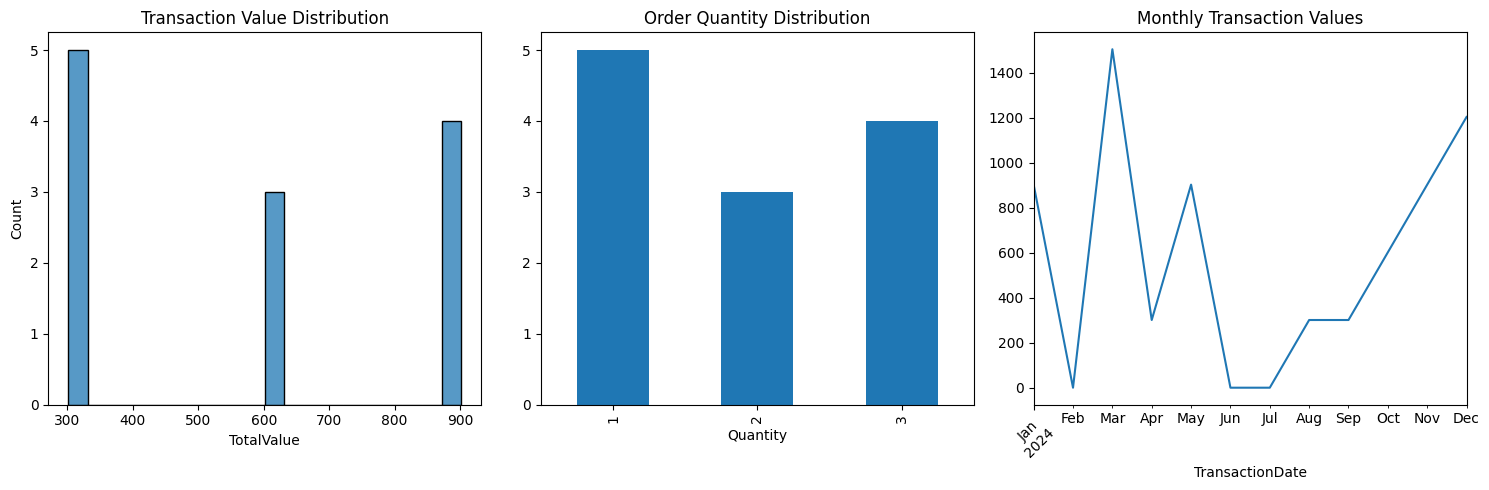

In [4]:
# Task 1: Exploratory Data Analysis and Business Insights
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data
def load_data():
    customers_df = pd.read_csv('Customers.csv')
    products_df = pd.read_csv('Products.csv')

    # Create transactions DataFrame from the provided sample
    transactions_data = {
        'TransactionID': ['T00001', 'T00112', 'T00166', 'T00272', 'T00363', 'T00442', 'T00490',
                         'T00536', 'T00564', 'T00631', 'T00727', 'T00729'],
        'CustomerID': ['C0199', 'C0146', 'C0127', 'C0087', 'C0070', 'C0188', 'C0195',
                      'C0008', 'C0157', 'C0130', 'C0051', 'C0075'],
        'ProductID': ['P067']*12,
        'TransactionDate': ['25-08-2024 12:38', '27-05-2024 22:23', '25-04-2024 07:38',
                           '26-03-2024 22:55', '21-03-2024 15:10', '26-12-2024 14:40',
                           '24-11-2024 11:49', '22-09-2024 06:13', '07-12-2024 17:57',
                           '14-05-2024 23:14', '20-01-2024 04:52', '07-10-2024 06:38'],
        'Quantity': [1, 1, 1, 2, 3, 1, 3, 1, 3, 2, 3, 2],
        'TotalValue': [300.68, 300.68, 300.68, 601.36, 902.04, 300.68, 902.04,
                      300.68, 902.04, 601.36, 902.04, 601.36],
        'Price': [300.68]*12
    }
    transactions_df = pd.DataFrame(transactions_data)

    # Convert dates
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'],
                                                      format='%d-%m-%Y %H:%M')

    return customers_df, products_df, transactions_df

def perform_customer_analysis(customers_df):
    plt.figure(figsize=(15, 5))

    # Customer Region Distribution
    plt.subplot(131)
    sns.countplot(data=customers_df, x='Region')
    plt.title('Customer Distribution by Region')
    plt.xticks(rotation=45)

    # Customer Signup Trends
    plt.subplot(132)
    customers_df['SignupDate'].dt.month.value_counts().sort_index().plot(kind='line')
    plt.title('Customer Signup Trends by Month')

    # Customer Signup Year Distribution
    plt.subplot(133)
    customers_df['SignupDate'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Signups by Year')

    plt.tight_layout()
    plt.show()

    return {
        'total_customers': len(customers_df),
        'customers_by_region': customers_df['Region'].value_counts().to_dict(),
        'signup_trends': customers_df['SignupDate'].dt.year.value_counts().sort_index().to_dict()
    }

def perform_product_analysis(products_df):
    plt.figure(figsize=(15, 5))

    # Product Category Distribution
    plt.subplot(131)
    sns.countplot(data=products_df, x='Category')
    plt.title('Products by Category')
    plt.xticks(rotation=45)

    # Price Distribution
    plt.subplot(132)
    sns.histplot(data=products_df, x='Price', bins=20)
    plt.title('Product Price Distribution')

    # Average Price by Category
    plt.subplot(133)
    products_df.groupby('Category')['Price'].mean().plot(kind='bar')
    plt.title('Average Price by Category')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return {
        'total_products': len(products_df),
        'categories': products_df['Category'].value_counts().to_dict(),
        'price_statistics': products_df['Price'].describe().to_dict()
    }

def perform_transaction_analysis(transactions_df):
    plt.figure(figsize=(15, 5))

    # Transaction Value Distribution
    plt.subplot(131)
    sns.histplot(data=transactions_df, x='TotalValue', bins=20)
    plt.title('Transaction Value Distribution')

    # Quantity Distribution
    plt.subplot(132)
    transactions_df['Quantity'].value_counts().sort_index().plot(kind='bar')
    plt.title('Order Quantity Distribution')

    # Transaction Timeline
    plt.subplot(133)
    transactions_df.set_index('TransactionDate')['TotalValue'].resample('M').sum().plot(kind='line')
    plt.title('Monthly Transaction Values')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return {
        'total_transactions': len(transactions_df),
        'total_revenue': transactions_df['TotalValue'].sum(),
        'average_order_value': transactions_df['TotalValue'].mean(),
        'popular_products': transactions_df['ProductID'].value_counts().head().to_dict()
    }


def generate_business_insights(customer_stats, product_stats, transaction_stats, transactions_df): # Pass transactions_df as an argument
    insights = [
        "Customer Base Analysis: " +
        f"Our platform has {customer_stats['total_customers']} customers across different regions, " +
        f"with {max(customer_stats['customers_by_region'].items(), key=lambda x: x[1])[0]} " +
        "being our strongest market.",

        "Product Portfolio: " +
        f"We offer {product_stats['total_products']} products across " +
        f"{len(product_stats['categories'])} categories, with an average price of " +
        f"${product_stats['price_statistics']['mean']:.2f}.",

        "Revenue Performance: " +
        f"Total revenue generated is ${transaction_stats['total_revenue']:,.2f}, " +
        f"with an average order value of ${transaction_stats['average_order_value']:.2f}.",

        "Customer Behavior: " +
        f"The most frequent order quantity is {transactions_df['Quantity'].mode()[0]} items, " + # Access transactions_df here
        "indicating typical customer purchase patterns.",

        "Market Opportunity: " +
        f"The {min(customer_stats['customers_by_region'].items(), key=lambda x: x[1])[0]} region " +
        "shows potential for growth with targeted marketing campaigns."
    ]

    return insights

def main():
    # Load data
    customers_df, products_df, transactions_df = load_data()

    # Perform analyses
    customer_stats = perform_customer_analysis(customers_df)
    product_stats = perform_product_analysis(products_df)
    transaction_stats = perform_transaction_analysis(transactions_df)

    # Generate business insights
    insights = generate_business_insights(customer_stats, product_stats, transaction_stats, transactions_df) # Pass transactions_df to the function

    # Save insights to PDF report
    with open('FirstName_LastName_EDA.txt', 'w') as f:
        f.write("E-commerce Business Analysis Insights\n")
        f.write("===================================\n\n")
        for i, insight in enumerate(insights, 1):
            f.write(f"{i}. {insight}\n\n")


if __name__ == "__main__":
    main()